In [23]:
#import pandas liberary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import the data frame(csv file)
benin_malanville_df=pd.read_csv('benin-malanville.csv')

In [4]:
#observe five columns of the df
benin_malanville_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
#observe the shape
benin_malanville_df.shape

(525600, 19)

**As shown above the imported data contains 525600 entries(rows) and 19 columns(features)**

In [7]:
# display the general information
benin_malanville_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

**The data contains null values only in the Comments column. The data type of comment can't be float, so to see the data type let we observe the unique contents of that feature/column**

In [8]:
benin_malanville_df.Comments.unique()

array([nan])

##### No comments are included, so the data type is not an issue for this specific scenario rather we can drop it

In [9]:
benin_malanville_df.drop(columns=['Comments'], inplace=True)

**The data type of Timestamp is object but it must be a date,so let we convert it**

In [10]:
benin_malanville_df['Timestamp']=pd.to_datetime(benin_malanville_df.Timestamp)

In [11]:
benin_malanville_df.head(2)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2


In [12]:
#recheck it
benin_malanville_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [13]:
# observe the statistical summary
benin_malanville_df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743


GHI measures the total solar radiation received on a horizontal surface and is expressed in watts per square meter (W/m²). 
Since it represents the energy received, the value of GHI should always be zero or positive. The same is true for DNI and DHI; their values cannot be negative. The best way to handle such abnormalities is to consult the experts who collected the data. In our scenario, we can't reach them so better to drop those entries.  

In [16]:
df_filtered = benin_malanville_df[~((benin_malanville_df["GHI"] < 0) | (benin_malanville_df["DNI"] < 0) | (benin_malanville_df["DHI"] < 0))]

In [17]:
df_filtered.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,246878,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000
mean,2022-02-08 16:37:16.496002304,513.411100,356.480524,247.397346,501.775502,485.418619,31.271940,45.541173,2.802063,3.722219,0.587311,160.361394,11.926945,994.126139,0.001956,0.000860,47.396643,42.229899
min,2021-08-09 06:54:00,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.500000,8.400000
25%,2021-11-08 14:24:15,239.000000,61.200000,141.200000,218.800000,211.800000,27.700000,18.800000,1.700000,2.400000,0.400000,76.500000,8.500000,992.000000,0.000000,0.000000,38.800000,34.900000
50%,2022-02-09 13:18:30,520.300000,352.250000,227.800000,502.100000,484.900000,31.500000,44.600000,2.700000,3.600000,0.600000,161.300000,11.400000,994.000000,0.000000,0.000000,48.000000,42.400000
75%,2022-05-11 15:17:45,790.000000,605.300000,336.200000,786.400000,757.700000,35.400000,68.100000,3.800000,4.900000,0.700000,240.900000,14.700000,996.000000,0.000000,0.000000,56.500000,49.600000
max,2022-08-08 16:51:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,16.000000,22.300000,3.400000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000
std,NaN,304.765569,279.731019,143.420836,307.789277,298.429501,5.459802,27.015814,1.540762,1.898862,0.249724,95.546187,6.249953,2.637058,0.044188,0.030041,12.496610,10.599677


In [24]:
# the correlation can be calculated and mapped as below
correlation=df_filtered.corr(numeric_only=True)
correlation

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
GHI,1.000000,0.767136,0.617398,0.986808,0.987926,0.414207,-0.311479,0.351006,0.380851,0.356775,0.071266,0.386029,0.082283,-0.028405,-0.046339,0.876487,0.797738
DNI,0.767136,1.000000,0.029839,0.787601,0.787600,0.287826,-0.351069,0.258948,0.278999,0.253467,-0.052537,0.275747,0.090209,-0.016254,-0.036375,0.624479,0.579453
DHI,0.617398,0.029839,1.000000,0.576994,0.572522,0.296023,-0.137887,0.270724,0.290804,0.268439,0.123561,0.279785,0.026450,-0.019510,-0.045507,0.605912,0.526798
ModA,0.986808,0.787601,0.576994,1.000000,0.996993,0.368853,-0.362892,0.357557,0.385884,0.353604,0.002214,0.371315,0.126072,-0.027838,-0.044652,0.852156,0.755751
ModB,0.987926,0.787600,0.572522,0.996993,1.000000,0.365637,-0.322093,0.338067,0.366637,0.341570,0.029361,0.371591,0.128958,-0.027071,-0.044496,0.860925,0.772322
Tamb,0.414207,0.287826,0.296023,0.368853,0.365637,1.000000,-0.495461,0.114401,0.129950,0.155602,0.085613,0.317788,-0.693749,-0.040868,-0.043024,0.624597,0.731159
RH,-0.311479,-0.351069,-0.137887,-0.362892,-0.322093,-0.495461,1.000000,-0.262060,-0.265293,-0.198068,0.426491,-0.196781,0.307320,0.024173,0.053575,-0.290780,-0.243939
WS,0.351006,0.258948,0.270724,0.357557,0.338067,0.114401,-0.262060,1.000000,0.977856,0.668425,0.074661,0.166909,0.146755,-0.007692,0.082042,0.178937,0.094426
WSgust,0.380851,0.278999,0.290804,0.385884,0.366637,0.129950,-0.265293,0.977856,1.000000,0.778796,0.096110,0.235640,0.144053,-0.008083,0.079542,0.211184,0.127410
WSstdev,0.356775,0.253467,0.268439,0.353604,0.341570,0.155602,-0.198068,0.668425,0.778796,1.000000,0.181487,0.398550,0.085125,-0.007441,0.052737,0.251629,0.198663


In [20]:
# the correlation can be calculated and mapped as below
correlation=df_filtered[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb']].corr()
correlation

,GHI,DNI,DHI,ModA,ModB,Tamb
GHI,1.000000,0.767136,0.617398,0.986808,0.987926,0.414207
DNI,0.767136,1.000000,0.029839,0.787601,0.787600,0.287826
DHI,0.617398,0.029839,1.000000,0.576994,0.572522,0.296023
ModA,0.986808,0.787601,0.576994,1.000000,0.996993,0.368853
ModB,0.987926,0.787600,0.572522,0.996993,1.000000,0.365637
Tamb,0.414207,0.287826,0.296023,0.368853,0.365637,1.000000


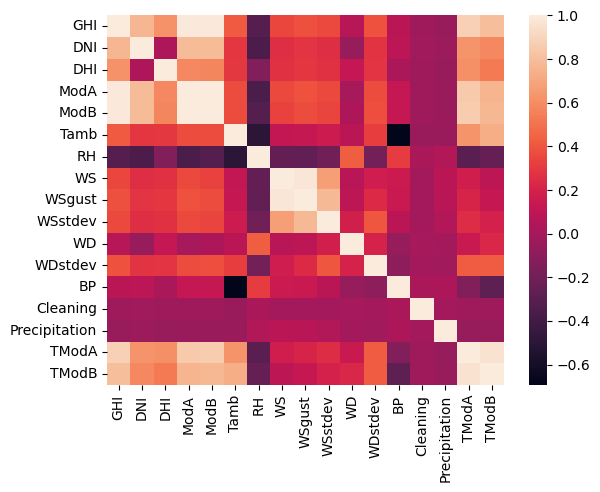

In [22]:
sns.heatmap(correlation);

**The correlation between GHI and DNI , and also GHI and DHI is highwhich is expected.**

In [59]:
df_filtered.head(1)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
413,2021-08-09 06:54:00,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7


In [64]:
df_filtered.Timestamp.dt.month.unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7])

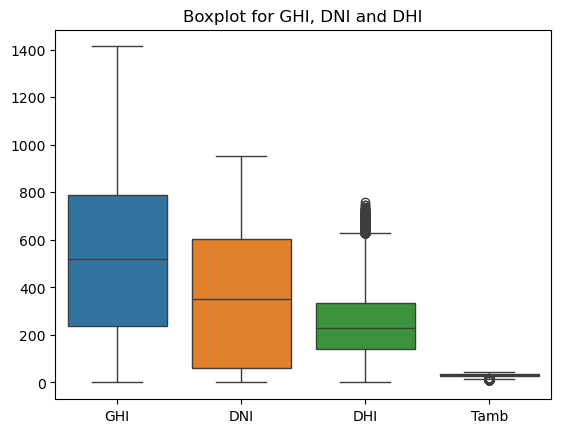

In [61]:
sns.boxplot(data=df_filtered[["GHI", "DNI","DHI",'Tamb']])
plt.title("Boxplot for GHI, DNI and DHI")
plt.show()

**It is clear that there is no outlier in GHI and DNI but in DHI and Tampb. We can see all features in similar way**

## Time Series analysis

In [26]:
#let we extract the year and month of the date column
df_filtered['Year']=df_filtered.Timestamp.dt.year
df_filtered['Month']=df_filtered.Timestamp.dt.month

C:\Users\Tamirat\AppData\Local\Temp\ipykernel_10292\3984867094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year']=df_filtered.Timestamp.dt.year
C:\Users\Tamirat\AppData\Local\Temp\ipykernel_10292\3984867094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month']=df_filtered.Timestamp.dt.month


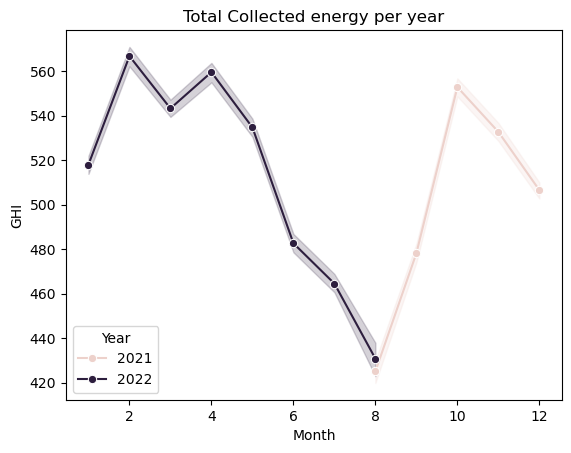

In [41]:
sns.lineplot(data=df_filtered, x="Month", y="GHI", hue="Year", marker="o")

# Add title and labels
plt.title("Total Collected energy per month")
plt.xlabel("Month")
plt.ylabel("GHI")

# Show plot
plt.show()

**The collected energy pattern of the two years is the same, and its value is high in the 2nd, the 3rd, 4th, and 10th months of the year which is dependent on the region's temperature level, which is indicated below.**

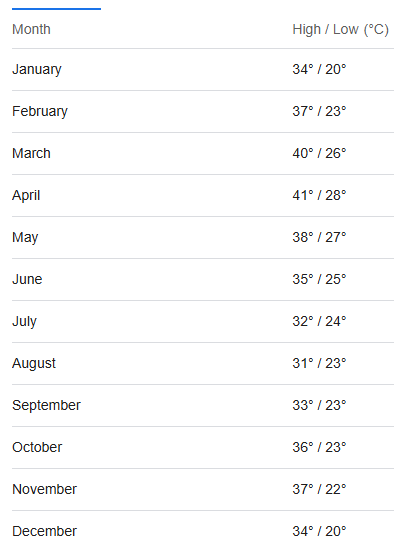

Source: https://www.google.com/search?q=benin-malanville+monthly+temperature&sca_esv=f3e18d54170f723c&sxsrf=ADLYWIJfhcBUPGCdZpywBvrmp2qbt1Sflw%3A1733648938557&ei=KmJVZ-PYIbHV7M8P5oCXgA0&oq=benin-malanville+monthly+tem&gs_lp=Egxnd3Mtd2l6LXNlcnAiHGJlbmluLW1hbGFudmlsbGUgbW9udGhseSB0ZW0qAggCMgcQIRigARgKMgcQIRigARgKMgcQIRigARgKMgUQIRiSAzIFECEYkgMyBRAhGJIDMgUQIRiSAzIFECEYkgNItIgBUJEYWMNlcAR4AJABAJgBnQOgAYYpqgEGMy0xMS4zuAEByAEA-AEBmAISoAKOK8ICCxAAGIAEGLADGKIEwgIEECMYJ8ICBBAuGB7CAgYQABgIGB7CAggQABiABBiiBMICBRAhGKABwgIEECEYCpgDAIgGAZAGBZIHBzQuMy04LjagB45G&sclient=gws-wiz-serp

In [40]:
df_filtered.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Year', 'Month'],
      dtype='object')

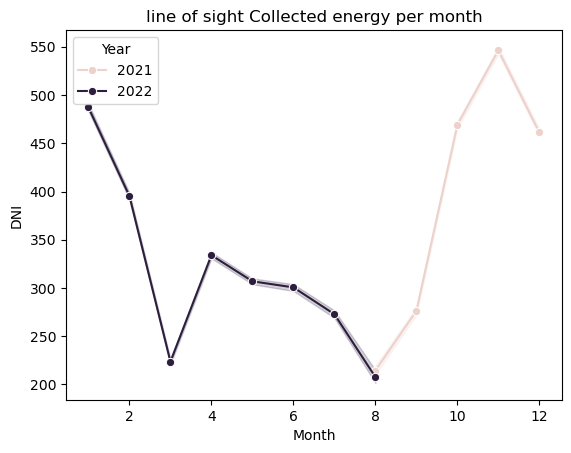

In [44]:
sns.lineplot(data=df_filtered, x="Month", y="DNI", hue="Year", marker="o")

# Add title and labels
plt.title("line of sight Collected energy per month")
plt.xlabel("Month")
plt.ylabel("DNI")

# Show plot
plt.show()

**In months 1,10,11, and 12, the collected energy from the line of sight is high. The total collected power was high in months 2,3 and 4. From the two statements we can see the overall energy collection level can be maximized through arranging module alignments.**

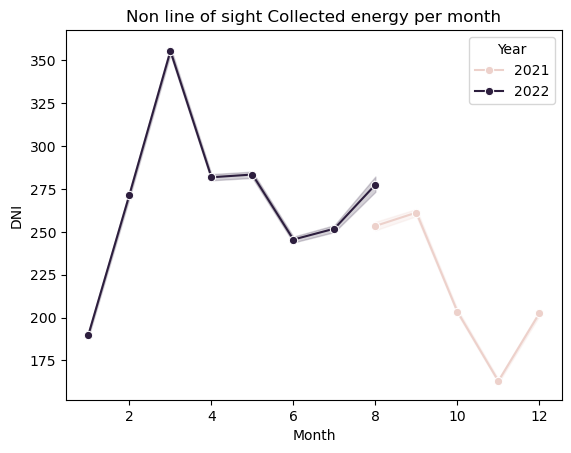

In [45]:
sns.lineplot(data=df_filtered, x="Month", y="DHI", hue="Year", marker="o")

# Add title and labels
plt.title("Non line of sight Collected energy per month")
plt.xlabel("Month")
plt.ylabel("DNI")

# Show plot
plt.show()

**The collected energy through the non line of sight is high in month 3, this month was the one in which the lowest line of sight was collected**

# Summary

**This is the preliminary data analysis of the Benin-Malanville solar energy collection.** 
- In month 3 the line-of-sight energy collection is less than the non-line-of-sight, so solar panel arrangement must be done, the best result can be achieved through automatic systems.
- The total collected energy is high in months 2, 3, 4, and 10 in which regional temperature is relatively high.
- the total collected energy in the two years follows the same pattern.